In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from mc import *

In [3]:
from mrp import *

In [4]:
rs = RiverSwim()
pi = [1] * 6
mrp = MdpPi(rs, pi)

In [5]:
n = p2n(mrp.p)

In [6]:
np.diag(n)

array([155.71428571,  51.9047619 ,  17.3015873 ,   5.76719577,
         1.92239859,   4.48559671])

In [7]:
stationary_dist = 1 / np.diag(n)

In [8]:
stationary_dist

array([0.00642202, 0.01926606, 0.05779817, 0.1733945 , 0.52018349,
       0.22293578])

In [9]:
sum(_)

1.0000000000000002

In [11]:
n

array([[155.71428571,   3.33333333,   7.77777778,  12.59259259,
         17.5308642 ,  22.51028807],
       [515.71428571,  51.9047619 ,   4.44444444,   9.25925926,
         14.19753086,  19.17695473],
       [684.28571429, 168.57142857,  17.3015873 ,   4.81481481,
          9.75308642,  14.73251029],
       [737.14285714, 221.42857143,  52.85714286,   5.76719577,
          4.9382716 ,   9.91769547],
       [751.42857143, 235.71428571,  67.14285714,  14.28571429,
          1.92239859,   4.97942387],
       [752.85714286, 237.14285714,  68.57142857,  15.71428571,
          1.42857143,   4.48559671]])

In [98]:
tau = n.max(0)
tau

array([752.85714286, 237.14285714,  68.57142857,  15.71428571,
        17.5308642 ,  22.51028807])

In [18]:
np.linalg.eigvals(mrp.p)

array([ 1.        ,  0.88550167,  0.72274216,  0.5124078 ,  0.32934635,
       -0.04999797])

In [145]:
mrp.state = 0
s_r = [(s, r) for s, r in mrp.sample_transition(100000)]
ss, rr = zip(*s_r)

(array([  745.,  2158.,  5881., 17081., 51775., 22360.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

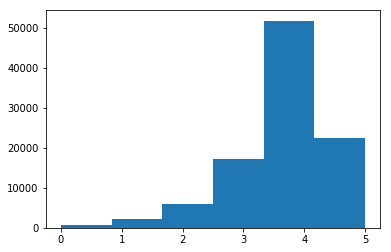

In [35]:
hist(ss, bins=mrp.n_states)

In [43]:
# Long term state distribution
[average(np.equal(ss, i)) for i in range(mrp.n_states)]

[0.0076, 0.02354, 0.06134, 0.17219, 0.51636, 0.21897]

In [44]:
stationary_dist

array([0.00642202, 0.01926606, 0.05779817, 0.1733945 , 0.52018349,
       0.22293578])

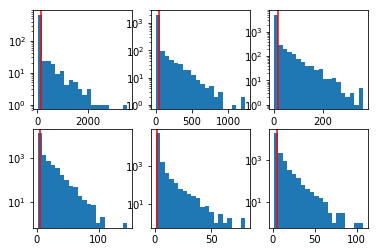

In [58]:
# Distribution of return times
for i in range(6):
    subplot(2, 3, i+1)
    waiting_times = argwhere(np.equal(ss, i)).flatten()
    return_times = waiting_times[1:] - waiting_times[:-1]
    hist(return_times, bins=20, log=True)
    axvline(1/stationary_dist[i], c='r')

In [13]:
p = mrp.p

In [14]:
p [0,0]

0.7

In [76]:
(p@p)[0,0] - p[0,0] * p[0,0]

0.02999999999999997

In [15]:
def first_return_at(p, s, t):
    # First return to s is at t (starting in s at t = 0)
    pz = np.copy(p)
    # Don't count the prob mass through state s
    pz[:, s] = 0
    a = np.eye(p.shape[0])
    for _ in range(t-1):
        a = a @ pz
    return (a @ p)[s, s]

In [16]:
i = 4
l = 100
p_fr = [first_return_at(p, i, t) for t in range(1, l)]

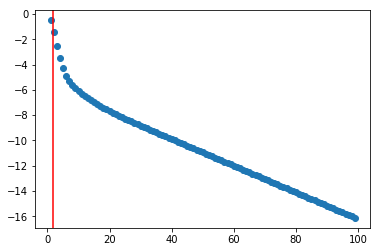

In [17]:
scatter(range(1, l), log(p_fr))
axvline(1/stationary_dist[i], c='r')

In [18]:
np.cumsum(p_fr)

array([0.6       , 0.84      , 0.921     , 0.9516    , 0.96537   ,
       0.972957  , 0.9779061 , 0.98150412, 0.98428485, 0.98650967,
       0.9883285 , 0.98983816, 0.99110605, 0.99218135, 0.99310095,
       0.99389312, 0.99457985, 0.99517846, 0.99570277, 0.99616391,
       0.99657094, 0.99693131, 0.9972512 , 0.99753579, 0.99778946,
       0.99801591, 0.99821835, 0.99839953, 0.99856182, 0.99870731,
       0.99883783, 0.99895498, 0.99906017, 0.99915467, 0.99923959,
       0.99931592, 0.99938455, 0.99944625, 0.99950175, 0.99955166,
       0.99959656, 0.99963696, 0.9996733 , 0.99970599, 0.99973542,
       0.99976189, 0.99978571, 0.99980715, 0.99982644, 0.9998438 ,
       0.99985943, 0.99987349, 0.99988614, 0.99989753, 0.99990777,
       0.999917  , 0.9999253 , 0.99993277, 0.99993949, 0.99994554,
       0.99995099, 0.99995589, 0.9999603 , 0.99996427, 0.99996784,
       0.99997106, 0.99997395, 0.99997656, 0.9999789 , 0.99998101,
       0.99998291, 0.99998462, 0.99998616, 0.99998754, 0.99998

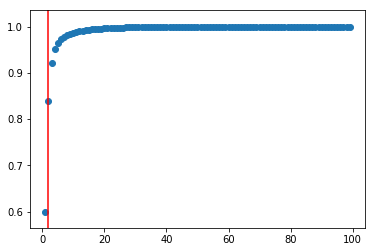

In [19]:
scatter(range(1, l), np.cumsum(p_fr))
axvline(1/stationary_dist[i], c='r')

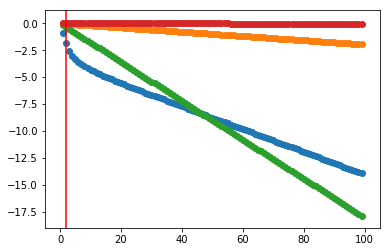

In [26]:
# Exponential concentration of return/hitting times (Aldous & Fill, 1999) and (Lee et al, 2013)
scatter(range(1, l), log(1 - np.cumsum(p_fr)))
scatter(arange(1, l), (arange(1, l) / (2 * n[:, i].max()) )*log(0.5))
scatter(arange(1, l), (arange(1, l) / (2 * n[i, i]) )*log(0.5))
scatter(arange(1, l), (arange(1, l) / (2 * n.max()) )*log(0.5))
axvline(1/stationary_dist[i], c='r')

In [21]:
n[:, i]

array([17.5308642 , 14.19753086,  9.75308642,  4.9382716 ,  1.92239859,
        1.42857143])

In [28]:
from importlib import reload

In [29]:
import estimate
reload(estimate)

<module 'estimate' from '/Users/dai/dev/ml/loop-estimate/estimate.py'>

In [52]:
discount = 0.9

In [53]:
v = estimate.exact(p, mrp.r, discount)
v

array([1530.96399823, 2097.98770128, 3064.02808425, 4520.86676163,
       6680.87475099, 9875.27547003])

In [237]:
estimate.loop_single(5, s_r, discount)

9846.040131501746

In [218]:
estimate.loop(6, s_r, discount)

array([1360.05520952, 1964.96599406, 2904.29586996, 4417.05826221,
       6611.17721527, 9846.0401315 ])

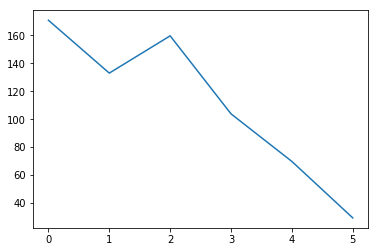

In [219]:
plot(np.abs(_-v))

In [207]:
def l1_error(estimator, s_r, step, discount, v):
    errors = []
    for sl in arange(0, len(s_r), step):
        v_hat = estimator(6, s_r[:sl], discount)
        errors.append(np.abs(v_hat - v))
    errors = np.vstack(errors)
    return errors

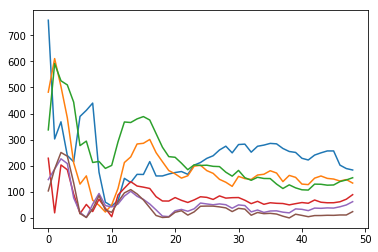

In [222]:
errors = l1_error(estimate.loop, s_r, 2000, discount, v)
# Error per state
plot(errors[1:])

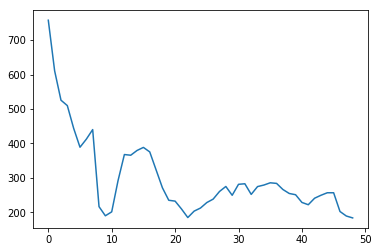

In [223]:
# The max norm
plot(errors[1:].max(1))

In [230]:
errors[-1].max()

184.00286457847506

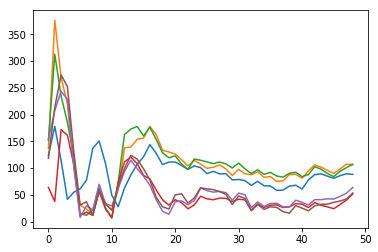

In [224]:
errors_mb = l1_error(estimate.model_based, s_r, 2000, discount, v)
# Error per state
plot(errors_mb[1:])

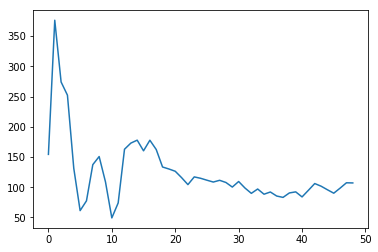

In [225]:
plot(errors_mb[1:].max(1))

In [229]:
errors_mb[-1].max()

107.0850036799784

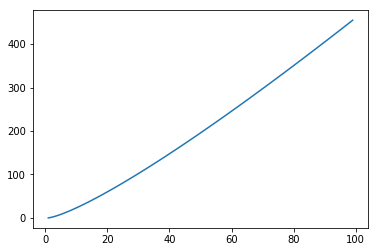

In [281]:
tt = arange(1, 100)
# plot(tt, 1/np.sqrt(tt))
plot(tt, tt * log(tt))

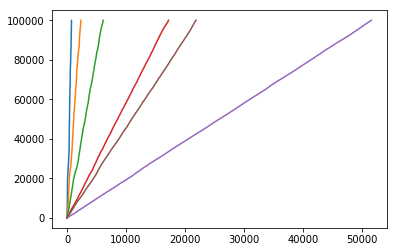

In [280]:
# Waiting times over steps (expect to be nearly linear O(n log n))
for i in range(6):
    wait_times = argwhere(np.equal(ss, i)).reshape(-1)
    plot(wait_times)

In [306]:
mean(estimate.loop_single(0, s_r, discount)[1] - v[0])

-198.47248846782023

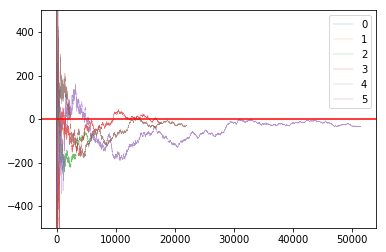

In [68]:
# Centered value error over visits (expect to scale like O(1/√n))
for i in range(6):
    v_hats = estimate.loop_single(i, s_r, discount)[1]
    plot(v_hats - v[i], alpha=0.7, lw=0.3)
legend(range(6))
ylim(-500, 500)
axhline(0, c='r')

In [69]:
len(v_hats)

22043

In [187]:
discount = 0.99
v = estimate.exact(mrp.p, mrp.r, discount)

In [188]:
v

array([56687.64891748, 58596.32396521, 61205.48918197, 64136.00180244,
       67272.30068274, 70582.79427189])

In [189]:
s_r = [(s, r) for s, r in mrp.sample_transition(100000)]
ss, rr = zip(*s_r)

In [192]:
from scipy.interpolate import interp1d

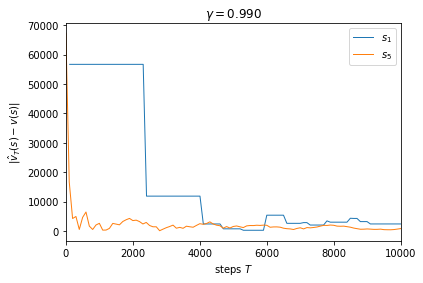

In [199]:
# Centered value error over steps (expect to scale like tilde-O(1/√T))
# for i in range(6):
for i in [0, 4]:
    v_hats = estimate.loop_single(i, s_r, discount)[1]
    w_n = np.argwhere(np.equal(ss, i)).reshape(-1)[1:]
#     plot(w_n, np.abs(v_hats - v[i]) * np.sqrt(w_n), lw=0.5)
#     plot(w_n, np.log(np.abs(v_hats - v[i])), lw=1, alpha=0.5, label='v(s_%i)' % i)
    fi = interp1d(w_n, np.abs(v_hats - v[i]), 'previous')
    xnew = np.linspace(w_n.min(), w_n.max(), num=1001, endpoint=True)
    plot(xnew, fi(xnew), lw=1, label='$s_%i$' % (i+1))
# ylim(0, 2000)
xlim(0, 10000)
xlabel('steps $T$')
ylabel('$|\hat{v}_T(s) - v(s)|$')
title('$\gamma = %.3f$' % discount)
# axhline(0, c='black', lw=0.5)
legend()
savefig('loop-states-0.99.pdf')

In [422]:
reload(estimate)

<module 'estimate' from '/Users/dai/dev/ml/loop-estimate/estimate.py'>

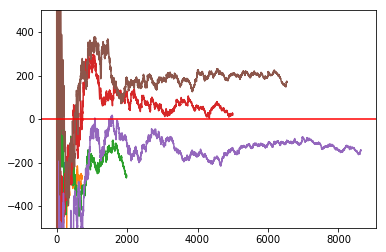

In [365]:
for i in range(6):
    v_hats = estimate.geometric_single(i, s_r, discount)[1]
    plot(v_hats - v[i])
ylim(-500, 500)
axhline(0, c='r')

In [112]:
tau

array([752.85714286, 237.14285714,  68.57142857,  15.71428571,
        17.5308642 ,  22.51028807])

<BarContainer object of 6 artists>

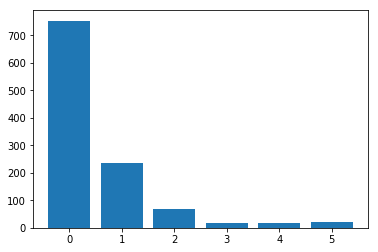

In [109]:
bar(range(6), tau)

In [113]:
np.diag(n)

array([155.71428571,  51.9047619 ,  17.3015873 ,   5.76719577,
         1.92239859,   4.48559671])

<BarContainer object of 6 artists>

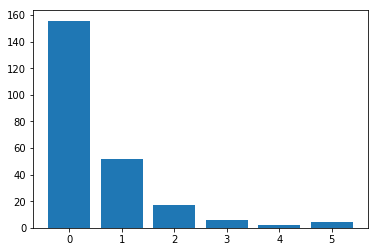

In [111]:
bar(range(6), np.diag(n))

<BarContainer object of 6 artists>

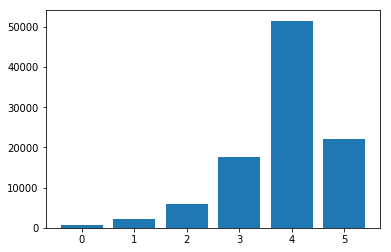

In [108]:
# Visits to each states
visits = np.zeros(6)
for i in range(6):
    visits[i] = len(argwhere(np.equal(ss, i)).reshape(-1))
bar(range(6), visits)

In [369]:
# Many visits are skipped due to the random geometric fragment lengths depending on gamma
len(estimate.geometric_single(0, s_r, discount)[1]), visits[0]

(235, 760.0)

In [402]:
len(estimate.loop_single(0, s_r, discount)[1])

759

(array([292., 368., 197.,  85.,  28.,  15.,   5.,   5.,   2.,   3.]),
 array([  4.10130513,  34.59546853,  65.08963193,  95.58379534,
        126.07795874, 156.57212215, 187.06628555, 217.56044895,
        248.05461236, 278.54877576, 309.04293917]),
 <a list of 10 Patch objects>)

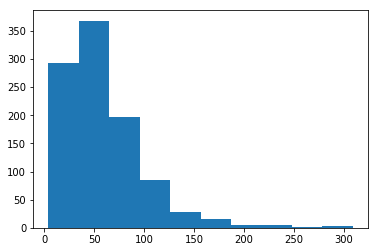

In [419]:
# Is loop estimator unbiased?
v_hats = []
for _ in range(1000):
    mrp.state = 0
    s_r0 = [(s, r) for s, r in mrp.sample_transition(10000)]
#     v_hat = estimate.geometric_single(4, s_r0, discount)[0]
#     v_hat = estimate.loop_single(0, s_r0, discount)[0]
#     v_hat = estimate.model_based(6, s_r0, discount)[0]
    v_hat = estimate.td(6, s_r0, lambda n: 1/(n+1), discount)[0]
    v_hats.append(v_hat)
hist(v_hats)

In [416]:
np.argwhere(np.not_equal(v_hats, 0)).reshape(-1).shape

(1000,)

In [420]:
mean(v_hats), v[0]

(59.678287703075576, 1530.9639982308481)

In [401]:
np.diag(n)

array([155.71428571,  51.9047619 ,  17.3015873 ,   5.76719577,
         1.92239859,   4.48559671])

In [390]:
# Model-based
mean(v_hats)

1610.4601957100333

In [388]:
# Loop
mean(v_hats)

995.145665078148

In [386]:
# Geometric
mean(v_hats)

1635.5549783549784

In [381]:
v[0]

1530.9639982308481

In [215]:
estimate.td_k(1, 6, s_r, discount)

array([  449.51908945,  1101.1776873 ,  2341.08075587,  4361.24153942,
        7133.88684337, 10385.21765199])

In [214]:
estimate.td_k(100, 6, s_r, discount)

array([56018.35430733, 58017.11205106, 60489.35157452, 63855.15271997,
       67600.38450932, 70973.09352582])

In [247]:
# Comparison with other methods
discount = 0.9
step = 10000
min_step = 200
geom_seeds = [123, 99, 23, 94538, 5943, 3471]
sls = arange(min_step, len(s_r), step)
# td_step = 1

v = estimate.exact(mrp.p, mrp.r, discount)

v_hat_geoms = []
v_hat_loops = []
v_hat_mbs = []
# v_hat_tds = []

for sl in sls:
    v_hat_geom = np.zeros(6)
    v_hat_loop = np.zeros(6)
#     v_hat_td = np.zeros(6)

    for i in range(6):
        v_hat_loop[i] = estimate.loop_single(i, s_r[:sl], discount)[0]
        v_hat_geom[i] = estimate.geometric_single(i, s_r[:sl], discount, seed=geom_seeds[i])[0]
    
    v_hat_loops.append(v_hat_loop)
    v_hat_geoms.append(v_hat_geom)
    
    v_hat_mbs.append(estimate.model_based(6, s_r[:sl], discount))
#     v_hat_tds.append(estimate.td_k(td_step, 6, s_r[:sl], discount))
    
v_hat_geoms = np.vstack(v_hat_geoms)
# v_hat_tds = np.vstack(v_hat_tds)
v_hat_mbs = np.vstack(v_hat_mbs)
v_hat_loops = np.vstack(v_hat_loops)

In [248]:
v

array([1530.96399823, 2097.98770128, 3064.02808425, 4520.86676163,
       6680.87475099, 9875.27547003])

In [249]:
# Select a good k for TD(k)
all_td_steps = [1, 10, 100, 1000]
all_tds = []
for td_step in all_td_steps:
    v_hat_tds = []

    for sl in sls:
        v_hat_tds.append(estimate.td_k(td_step, 6, s_r[:sl], discount))
    v_hat_tds = np.vstack(v_hat_tds)
    all_tds.append(v_hat_tds)

In [250]:
legends = ['loop', 'geom', 'model'] + ['td(%i)' % td_step for td_step in all_td_steps]
v_hats_all = [v_hat_loops, v_hat_geoms, v_hat_mbs] + all_tds

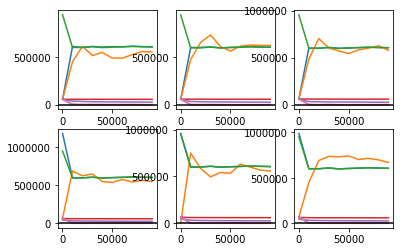

In [203]:
# Plot and compare each state
for i in range(6):
    subplot(2, 3, 1 + i)
    for name, v_hats in zip(legends, v_hats_all):
        plot(sls, np.abs(v_hats[:, i] - v[i]), label=name)
    axhline(0, c='black')
#     legend()
# Blue - loop
# Orange - geom
# Green - td
# Red - model-based

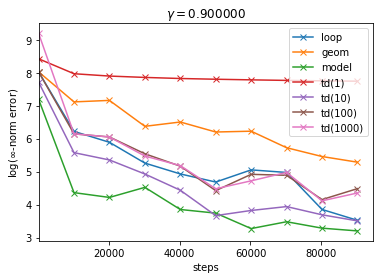

In [252]:
# Plot by inf-norm
for name, v_hats in zip(legends, v_hats_all):
    plot(sls, log(np.abs(v_hats - v.reshape((1, -1))).max(1)), 'x-', label=name)
#     print(np.abs(v_hats - v.reshape((1, -1))).max(1))
#     plot(sls, np.abs(v_hats - v.reshape((1, -1))).max(1), 'x-', label=name)
# axhline(0, c='black')
legend()
# legend(loc='lower right')
ylabel('$\log(\infty$-norm error)')
xlabel('steps')
title('$\gamma=%f$' % discount)
# ylim(bottom=0)
xlim(left=min_step)
savefig('gamma_%fk_%i.pdf' % (discount, td_step))